In [1]:
# imports
from numbers import Number
from typing import Sequence, Callable, Union
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm
import numdifftools as nd


In [2]:
# function definitions
def f(x : Number) -> Number:
    return 10 * pow(x, 4) + 3 * pow(x, 3) -30 * x * x + 10*x


def g(x :  Sequence) -> Number:
    return 10 * pow(x[1], 4) + 10 * pow(x[0], 4) + 3 * pow(x[0], 3) - 30 * x[0] * x[0] + 10 * x[0] 

## plotting

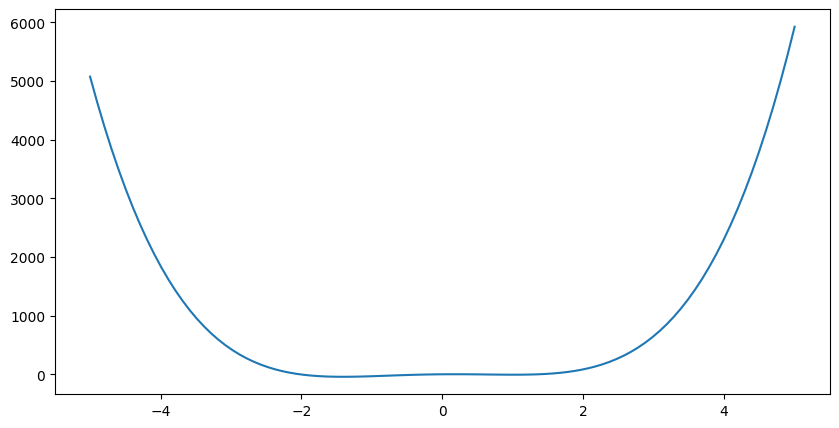

In [3]:
# f(x) plot
x = np.linspace(-5, 5, 100)
fig = plt.figure(figsize = (10, 5))
plt.plot(x, f(x))

/tmp/ipykernel_8653/500862614.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


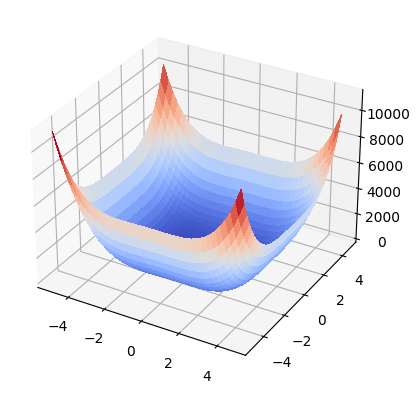

In [4]:
# g(x) plot

# external window
# %matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = g([X, Y])

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

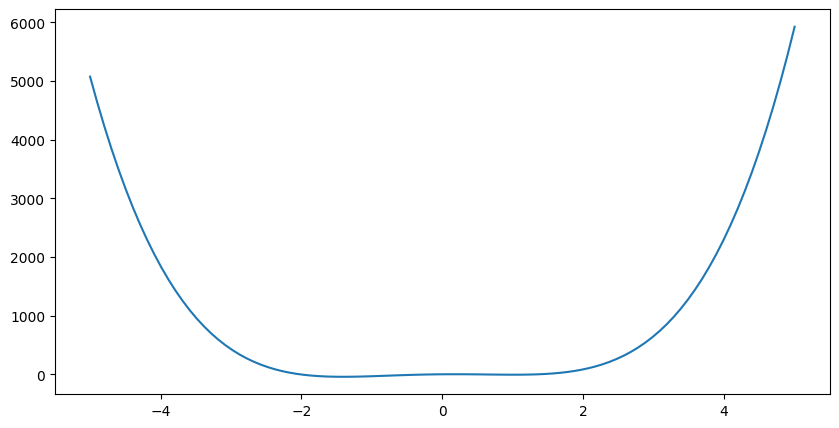

In [5]:
# f(x) plot
x = np.linspace(-5, 5, 100)
fig = plt.figure(figsize = (10, 5))
plt.plot(x, f(x))

/tmp/ipykernel_8653/500862614.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


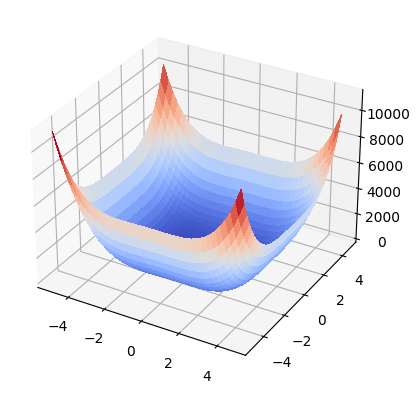

In [6]:
# g(x) plot

# external window
# %matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = g([X, Y])

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

## optimalisation

In [7]:
# params
eps = 0.001

In [8]:
class GradientDescent:
    def __init__(self, eps: Number) -> None:
        self._eps = eps

    @staticmethod
    def _gradient(function: Callable) -> Callable:
        return nd.Gradient(function)

    def _stop_test(self, gradient_at_point: Sequence, point: Number, next_point: Number) -> bool:
        # stationary test
        stationary = np.linalg.norm(gradient_at_point) <= self._eps
        # distance beetwen poins
        dist =  np.linalg.norm(next_point - point) <= self._eps
        return stationary and dist

    def find_minumum(self, function: Callable, step: Number, starting_point=Union[Number, Sequence]) -> Sequence:
        gradient = self._gradient(function)
        found_minimum = False
        points = [starting_point]
        while not found_minimum:
            gradient_at_point = gradient(points[-1])
            next_point = points[-1] + step * gradient_at_point
            found_minimum = self._stop_test(gradient_at_point, points[-1], next_point)
            points.append(next_point)
        return points


## tuning f(x) min

In [9]:
gradient_descent = GradientDescent(0.001)
min_f = gradient_descent.find_minumum(f, 0.1, -4)
print(min_f)

[-4, -220.59999999999974, -42896529.3400013, -3.1573771129122655e+23, -3.1573771129122655e+23]


In [10]:
min_g = gradient_descent.find_minumum(g, 0.4, [10,15])
print(min_g)

[[10, 15], array([16134., 54015.]), array([6.71973574e+13, 2.52152410e+15]), array([6.71973574e+13, 2.66605031e+47]), array([6.71973574e+13, 2.66605031e+47])]


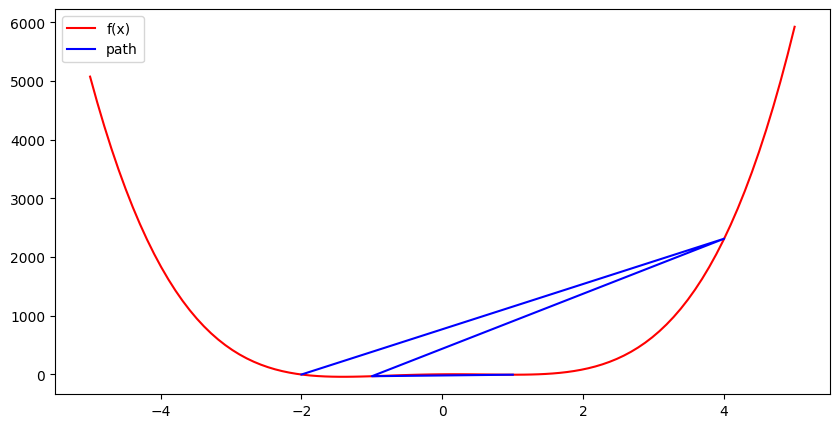

In [11]:
x = np.linspace(-5, 5, 100)
fig = plt.figure(figsize = (10, 5))
plt.plot(x, f(x), color="r", label="f(x)")
arguments = [-2, 4, -1, 1]
plt.plot(arguments, [f(x) for x in arguments], color="b", label="path")
plt.legend()